<a href="https://colab.research.google.com/github/emmanuelappiah2/login04/blob/main/Emmanuel_Appiah_Dankwah_Index_No__UEPH1400422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Emmanuel  Appiah Dankwah. 
# Index No. :_UEPH1400422
# Course title/code: Computational Intelligence/COMP 803
# Lecturer: Dr. Patrick Mensah


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
#reshaping training labels
y_train=y_train.reshape(-1)

In [ ]:
# Define the CNN model architecture
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))


In [ ]:
# Compile the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:

# saving model
model.save('cifar10_model.h5')

In [ ]:
# Train the model
history=model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4919 - accuracy: 0.4595 - val_loss: 1.2404 - val_accuracy: 0.5499
Epoch 2/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1220 - accuracy: 0.6033 - val_loss: 1.0321 - val_accuracy: 0.6393
Epoch 3/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9646 - accuracy: 0.6638 - val_loss: 0.9444 - val_accuracy: 0.6653
Epoch 4/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8730 - accuracy: 0.6951 - val_loss: 0.9327 - val_accuracy: 0.6763
Epoch 5/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7991 - accuracy: 0.7223 - val_loss: 0.8654 - val_accuracy: 0.7017
Epoch 6/15
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7427 - accuracy: 0.7410 - val_loss: 0.8610 - val_accuracy: 0.7024
Epoch 7/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6905 - accuracy: 0.7593 - val_loss: 0.8514 -

In [ ]:
# making a prediction sample
y_pred=model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
y_pred[8]

array([ -6.511362 , -10.901186 ,   0.285806 ,   5.6502705,   3.3251996,
         3.091201 ,   1.5051833,   4.9305577,  -6.1445913,  -6.412272 ],
      dtype=float32)

In [ ]:
# evaluating the architecture using the x_test and y_test datasets 
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0212 - accuracy: 0.7042


[1.0211517810821533, 0.704200029373169]

In [ ]:
# library for printing the performance parameters from the cnn architecture
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np
# Converting the predicted probabilities to discrete labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1000
           1       0.83      0.82      0.82      1000
           2       0.58      0.61      0.59      1000
           3       0.53      0.51      0.52      1000
           4       0.72      0.61      0.66      1000
           5       0.61      0.62      0.61      1000
           6       0.70      0.84      0.76      1000
           7       0.72      0.78      0.75      1000
           8       0.88      0.72      0.79      1000
           9       0.80      0.79      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [ ]:
# Convert predicted probabilities to discrete labels
y_pred_labels = np.argmax(y_pred, axis=1)


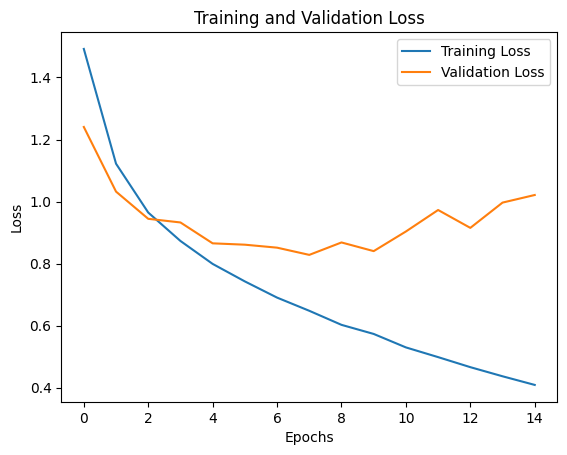

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

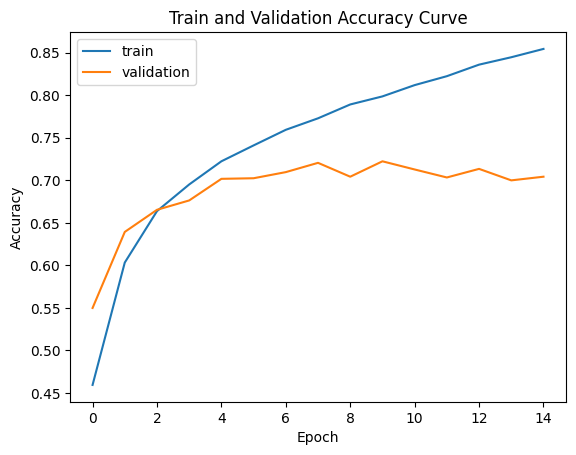

In [ ]:
# Ploting the train and validation accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Train and Validation Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

[[747  17  80  32  14  12  16  16  34  32]
 [ 29 816  12  10   3   4  24   5  14  83]
 [ 54   6 609  67  56  67  87  37  10   7]
 [ 17  12  82 509  47 172  81  59  11  10]
 [ 17   4  92  70 614  51  60  80   8   4]
 [ 15   5  54 154  29 623  44  69   2   5]
 [  9   1  46  53  26  13 836   8   4   4]
 [ 12   1  41  28  48  63  13 778   2  14]
 [115  33  26  28  10  12  12   8 722  34]
 [ 45  86  11  15   1  11  14  19  10 788]]


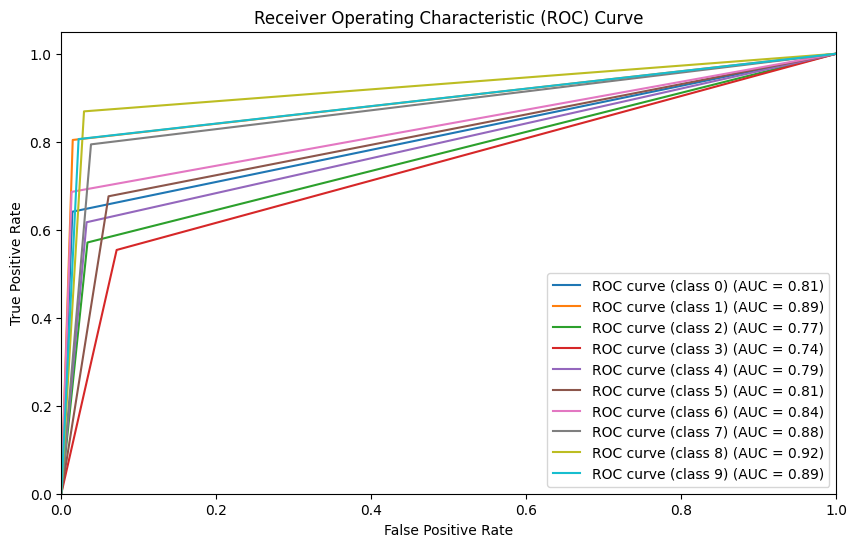

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


313/313 [==============================] - 3s 9ms/step


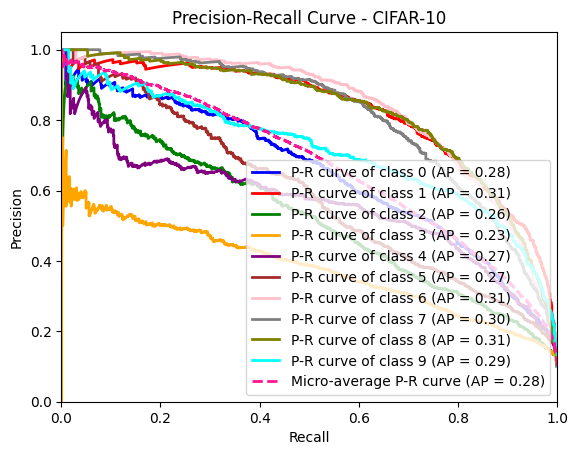

In [ ]:
# Perform predictions
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[i for i in range(10)])

# Compute Precision-Recall curve and Average Precision Score for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision[i] = np.average(precision[i])

# Compute micro-average Precision-Recall curve and Average Precision Score
precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_prob.ravel())
average_precision_micro = np.average(precision_micro)

# Plot Precision-Recall curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(10):
    plt.plot(recall[i], precision[i], color=colors[i], lw=2,
             label='P-R curve of class {0} (AP = {1:0.2f})'
             ''.format(i, average_precision[i]))

# Plot micro-average Precision-Recall curve
plt.plot(recall_micro, precision_micro, color='deeppink', lw=2, linestyle='--',
         label='Micro-average P-R curve (AP = {0:0.2f})'
         ''.format(average_precision_micro))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - CIFAR-10')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np

# Define the number of abstraction test samples and input shape
num_samples = 100  # Replace with the desired number of abstraction test samples
input_shape = (32, 32, 3)  # Replace with the input shape of your model

# Generate new samples for the abstraction test
x_abstraction_test = np.random.rand(num_samples, *input_shape)  # Replace with your own code to generate samples

# Preprocess the abstraction test samples
x_abstraction_test = x_abstraction_test.astype("float32") / 255.0  # Replace with your own preprocessing steps if needed

# Make predictions on the abstraction test samples
y_abstraction_test = model.predict(x_abstraction_test)

# Perform further analysis or evaluation on the abstraction test predictions
# You can calculate metrics, visualize the results, or compare them with ground truth if available
# Example:
predicted_labels = np.argmax(y_abstraction_test, axis=1)
# Perform further analysis on the predicted labels



4/4 [==============================] - 0s 7ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


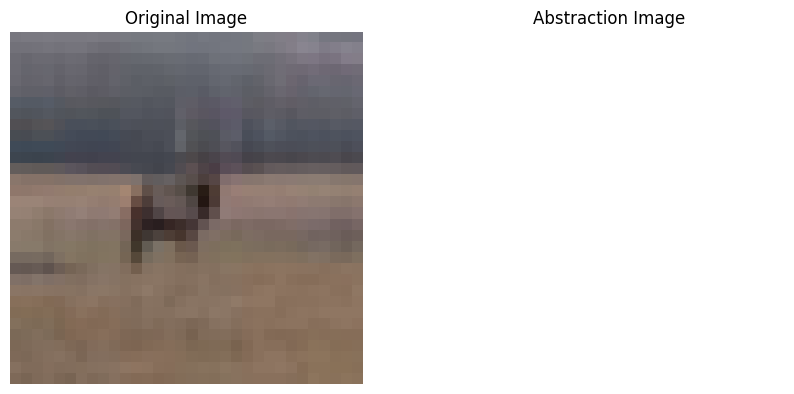

In [ ]:

from lime import lime_image
from skimage.segmentation import mark_boundaries
from keras.datasets import cifar10
from keras.models import load_model

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


model_path = 'cifar10_model.h5'
model = load_model('cifar10_model.h5')

# function to preprocess and predict using your model
def predict_fn(images):
    # Preprocess the images if necessary
    # Return the predictions from your model
    return model.predict(images)

# Selecting random image from the test set
random_index = np.random.randint(len(x_test))
image = x_test[random_index]

# Create the LIME explainer object
explainer = lime_image.LimeImageExplainer()

# Generating an explanation using LIME
explanation = explainer.explain_instance(image, predict_fn, top_labels=1)

#  superimpose it on the image
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
abstraction_image = mark_boundaries(temp / 2 + 0.5, mask)

# Plot the original image and the abstraction image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].imshow(abstraction_image)
axes[1].axis('off')
axes[1].set_title('Abstraction Image')
plt.show()

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=1ced75f3e1eb3b5359bd12f9840ca058a10487ef525e9cd1c8b12e9f6d5ef2c7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
